In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Model = tf.keras.models.load_model(r"Models/Detection2.keras")

In [ ]:
DetectionDataTesting = pd.read_csv(r"Dataset/Model/DataTesting.csv")
DetectionLabelTesting = pd.read_csv(r"Dataset/Model/LabelTesting.csv")

In [ ]:
DetectionPredictions = Model.predict(DetectionDataTesting, batch_size=2048)
DetectionBinaryPredictions = np.argmax(DetectionPredictions, axis=1)

#Precision
DetectionPrecision = tf.keras.metrics.Precision()
DetectionPrecision.update_state(DetectionLabelTesting, DetectionBinaryPredictions)
Score = DetectionPrecision.result().numpy() *100
DetectionPrecisionScore = round(Score,2)

# Accuracy
DetectionAccuracy = tf.keras.metrics.Accuracy()
DetectionAccuracy.update_state(DetectionLabelTesting, DetectionBinaryPredictions)
DetectionAccScore = DetectionAccuracy.result().numpy() * 100
DetectionAccuracyScore = round(DetectionAccScore, 2)

#Recall
DetectionRecall = tf.keras.metrics.Recall()
DetectionRecall.update_state(DetectionLabelTesting, DetectionBinaryPredictions)
DetectionRecScore = DetectionRecall.result().numpy() * 100
DetectionRecallScore = round(DetectionRecScore, 2)


print("Detection Model Metrics")
print("Precision:", DetectionPrecisionScore)
print("Accuracy:", DetectionAccuracyScore)
print("Precision:", DetectionPrecisionScore)

15123/15123 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step
Detection Model Metrics
Precision: 98.62
Accuracy: 99.64
Precision: 98.62


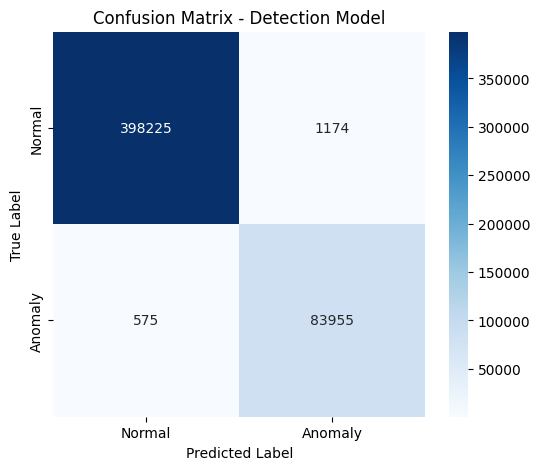

In [25]:
conf_matrix = confusion_matrix(DetectionLabelTesting, DetectionBinaryPredictions)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Detection Model")
plt.show()

In [ ]:
ClassificationDataTesting = pd.read_csv(r"Dataset/Model/ClassificationDataTesting.csv")
ClassificationLabelTesting = pd.read_csv(r"Dataset/Model/ClassificationLabelTesting.csv")

In [52]:
ClassModel = tf.keras.models.load_model(r"Models/Classification4.keras")

In [50]:
ClassPredictions = ClassModel.predict(ClassificationDataTesting)
BinaryPredictions = np.argmax(ClassPredictions, axis=1)

#Precision
ClassPrecision = tf.keras.metrics.Precision()
ClassPrecision.update_state(ClassificationLabelTesting, BinaryPredictions)
ClassScore = ClassPrecision.result().numpy() *100
ClassPrecisionScore = round(ClassScore,2)

#Accuracy
ClassAccuracy = tf.keras.metrics.Accuracy()
ClassAccuracy.update_state(ClassificationLabelTesting, BinaryPredictions)
ClassAccScore = ClassAccuracy.result().numpy() * 100
ClassAccuracyScore = round(ClassAccScore, 2)

#Recall
ClassRecall = tf.keras.metrics.Recall()
ClassRecall.update_state(ClassificationLabelTesting, BinaryPredictions)
ClassRecScore = ClassRecall.result().numpy() * 100
ClassRecallScore = round(ClassRecScore, 2)


print("Classification Model Metrics")
print("Recall:", ClassRecallScore)
print("Accuracy:", ClassAccuracyScore)
print("Precision:", ClassPrecisionScore)

15123/15123 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step
Classification Model Metrics
Recall: 97.66
Accuracy: 99.49
Precision: 99.52


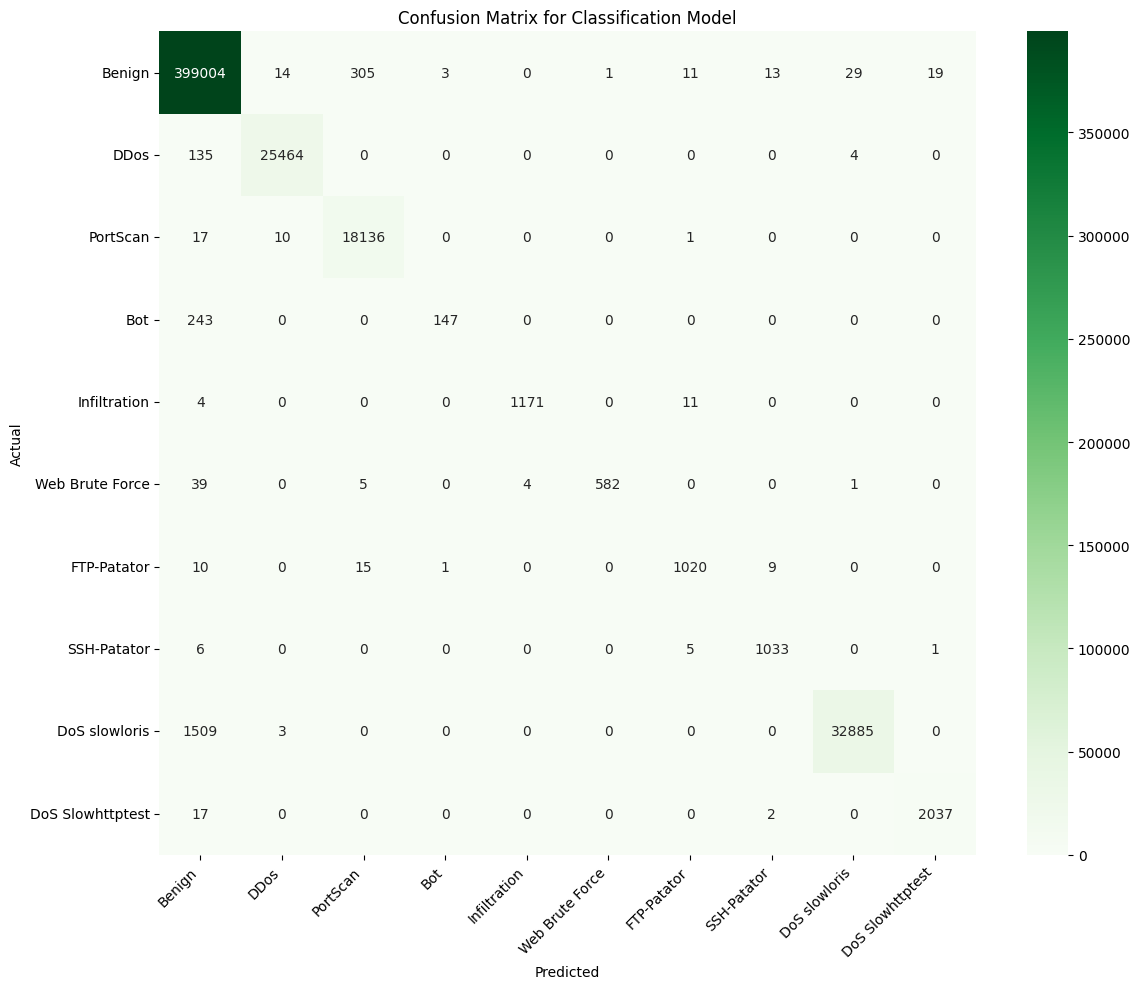

In [51]:
conf_matrix = confusion_matrix(ClassificationLabelTesting, BinaryPredictions)

ClassNames = ['Benign', 'DDos', 'PortScan', 'Bot', 'Infiltration', 
               'Web Brute Force', 'FTP-Patator', 'SSH-Patator', 
               'DoS slowloris', 'DoS Slowhttptest']

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=ClassNames, yticklabels=ClassNames)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Classification Model')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()